In [8]:
import pandas as pd
df = pd.read_csv('data/ROI_offset_exponent.csv')

display(df.describe())
display(df.head())


,CF,PW,BW,offset,exponent,error,r_squared
count,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
mean,15.177850,0.860072,5.895359,-16.321986,1.472771,0.068464,0.977296
std,5.565982,0.428462,3.377485,0.511989,0.399698,0.029213,0.029981
min,5.048190,0.096880,2.000000,-18.535991,-1.006172,0.015083,0.353745
25%,10.054417,0.527464,3.036298,-16.617492,1.268479,0.048974,0.976513
50%,14.775045,0.781087,4.279987,-16.315333,1.521124,0.065344,0.983901
75%,19.523708,1.118106,9.218224,-16.012262,1.733155,0.082642,0.988439
max,34.061661,2.256433,12.000000,-14.601266,2.492454,0.280417,0.998210


,CF,PW,BW,offset,exponent,error,r_squared,ROI,subjectID
0,20.607777,0.776834,12.000000,-15.948863,1.525243,0.121564,0.918738,inferiorparietal L,sub-032484
1,17.710910,0.589602,9.788238,-16.507155,1.063509,0.047806,0.974110,inferiorparietal R,sub-032484
2,27.519218,0.542765,7.035874,-16.507155,1.063509,0.047806,0.974110,inferiorparietal R,sub-032484
3,23.483525,0.742324,12.000000,-16.256626,1.323392,0.103640,0.919033,postcentral L,sub-032484
4,18.471758,0.500075,8.901831,-16.664725,1.064508,0.048572,0.973729,postcentral R,sub-032484


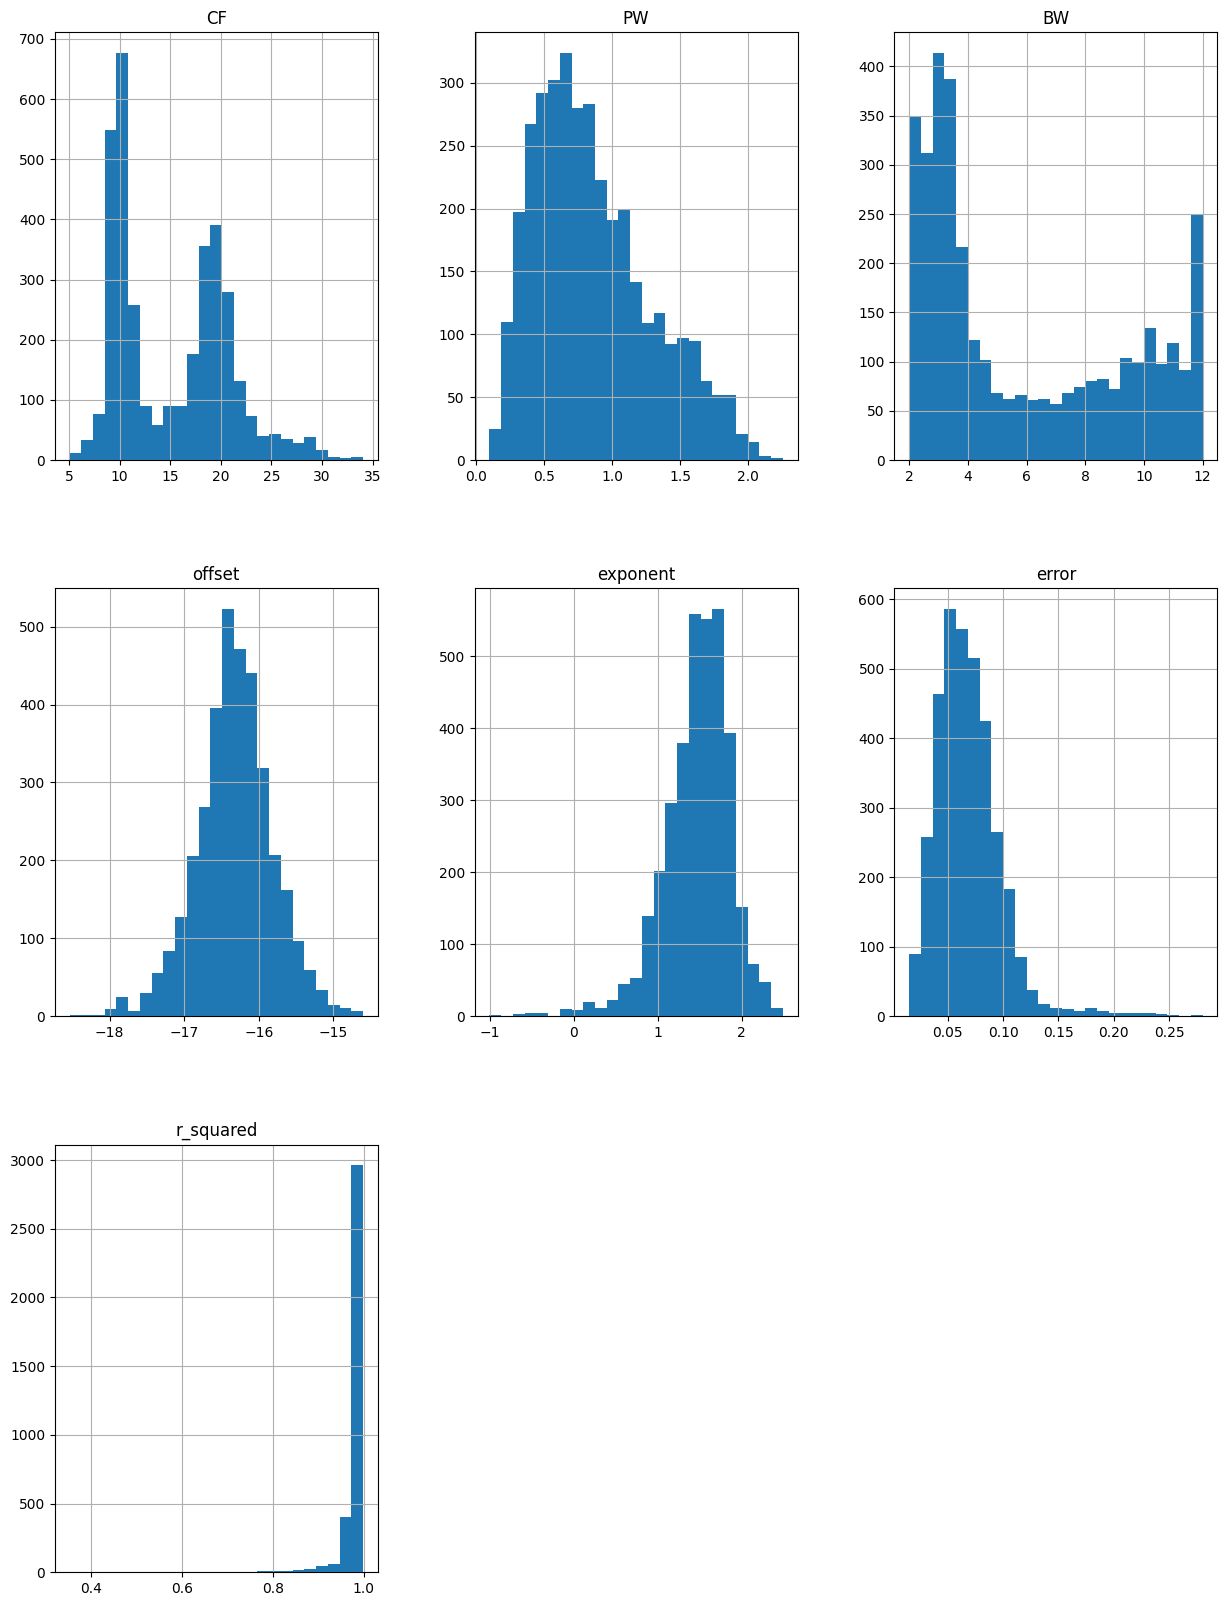

In [9]:
df.hist( figsize = (15,20),column = ['CF', 'PW', 'BW', 'offset', 'exponent', 'error', 'r_squared', 'ROI', 'subjectID'],  bins=25);

,subjectID,gender,age
0,sub-032301,1,65-70
1,sub-032302,1,20-25
2,sub-032303,1,65-70
3,sub-032304,2,25-30
4,sub-032305,1,65-70
...,...,...,...
223,sub-032524,2,20-25
224,sub-032525,2,20-25
225,sub-032526,2,20-25
226,sub-032527,2,20-25


<Axes: >

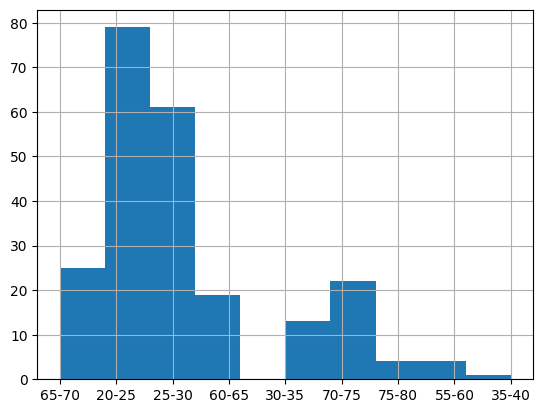

In [4]:
participants = pd.read_csv('data/Participants_LEMON.csv')
participants.columns = ['subjectID','gender','age']
display(participants)
participants["age"].hist()

<Axes: title={'center': 'Count of number of participants in different age intervals'}>

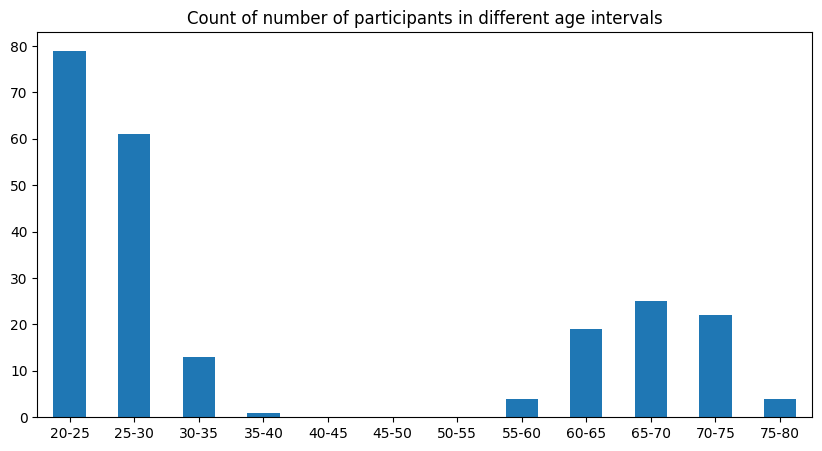

In [5]:
raw_cat = pd.Categorical(
   ....:     participants["age"], categories=['20-25', '25-30', '30-35','35-40','40-45','45-50','50-55',
    '55-60','60-65','65-70', '70-75','75-80'], ordered=True
   ....: )
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.title("Count of number of participants in different age intervals")
raw_cat.value_counts().plot.bar(rot=0)

In [6]:
result = pd.merge(df,
                 participants[['subjectID','gender','age']],
                 on='subjectID')
result.head()

,CF,PW,BW,offset,exponent,error,r_squared,ROI,subjectID,gender,age
0,9.441918,0.401458,4.611390,-16.097829,1.446015,0.049963,0.980045,inferiorparietal L,sub-032484,1,70-75
1,17.450857,0.621693,8.000000,-16.097829,1.446015,0.049963,0.980045,inferiorparietal L,sub-032484,1,70-75
2,26.454319,0.623602,7.992758,-16.097829,1.446015,0.049963,0.980045,inferiorparietal L,sub-032484,1,70-75
3,16.574238,0.585746,8.000000,-16.484095,1.079295,0.051719,0.970027,inferiorparietal R,sub-032484,1,70-75
4,26.458352,0.596520,8.000000,-16.484095,1.079295,0.051719,0.970027,inferiorparietal R,sub-032484,1,70-75


In [7]:
display(result["age"].unique())
x = {'20-25':'YOUNG', '25-30':'YOUNG', '30-35':'YOUNG','35-40':'YOUNG',
    '55-60':'OLD','60-65':'OLD','65-70':'OLD', '70-75':'OLD','75-80':'OLD', }
result['age_cond'] = result['age'].map(x)
csv_path =  'data/parietal_fooof_participants.csv'

result.to_csv(csv_path, index = False, header=True)

array(['70-75', '60-65', '20-25', '25-30', '65-70', '55-60', '75-80',
       '30-35', '35-40'], dtype=object)